## Exploring the data

sentiment
neutral     5079
positive    3219
negative    2378
Name: count, dtype: int64
sentiment
neutral     5364
positive    3652
negative    1660
Name: count, dtype: int64
sentiment
neutral     2597
positive    1850
negative    1077
Name: count, dtype: int64


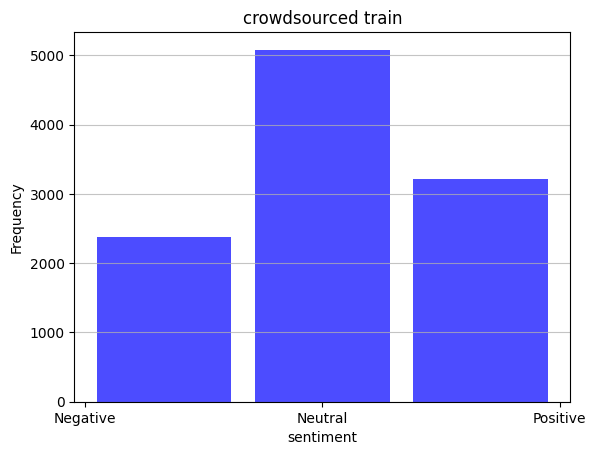

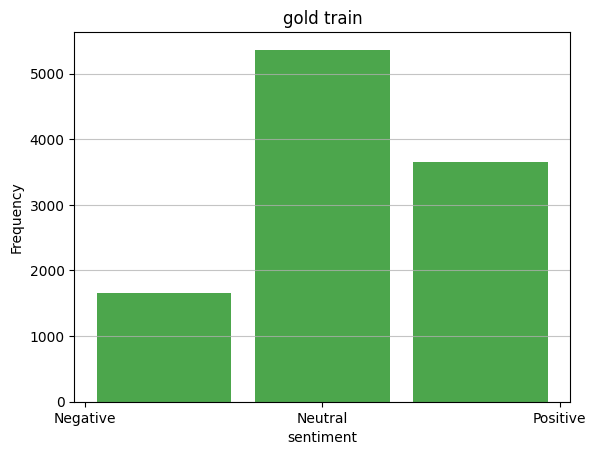

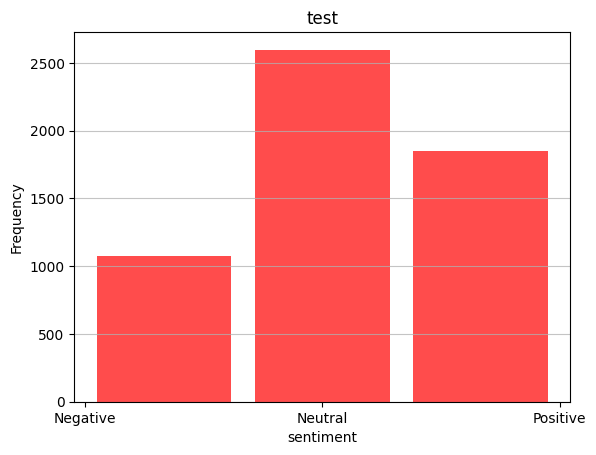

In [1]:
import pandas as pd

## convert tab separated files to csv

df1 = pd.read_csv('crowdsourced_train.csv', sep='\t')
df2 = pd.read_csv('gold_train.csv', sep='\t')
df3 = pd.read_csv('test.csv', sep='\t')




# 
df1_y = df1['sentiment']
for i in range(len(df1_y)):
    if "u" in df1_y[i]:
        df1_y[i] = "neutral"
    elif "g" in df1_y[i] or "Nedative" in df1_y[i]:
        df1_y[i] = "negative"
    elif "p" in df1_y[i] or "o" in df1_y[i] or "P" in df1_y[i]:
        df1_y[i] = "positive"
    


print(df1_y.value_counts())
df2_y = df2['sentiment']
print(df2_y.value_counts())
df3_y = df3['sentiment']
print(df3_y.value_counts())


import matplotlib.pyplot as plt

label_order = ['Negative', 'Neutral', 'Positive']
label_map = {'neutral': 1, 'negative': 0, 'positive': 2}
map_1 = df1_y.map(label_map)
map_2 = df2_y.map(label_map)
map_3 = df3_y.map(label_map)

plt.hist(map_1, bins=3, color='blue', alpha=0.7, rwidth=0.85)
plt.title('crowdsourced train')
plt.xlabel('sentiment')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.grid(axis='y', alpha=0.75)
plt.show()



plt.hist(map_2, bins=3, color='green', alpha=0.7, rwidth=0.85)
plt.title('gold train')
plt.xlabel('sentiment')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.grid(axis='y', alpha=0.75)
plt.show()



plt.hist(map_3, bins=3, color='red', alpha=0.7, rwidth=0.85)
plt.title('test')
plt.xlabel('sentiment')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.grid(axis='y', alpha=0.75)
plt.show()


In [2]:
## Agreement Score between crowdsourced_train and gold_train
n_agree = 0

for i in range(df1_y.size):
    if df1_y[i] == df2_y[i]:
        n_agree += 1
        

p0 = n_agree/df1_y.size

print(p0)

0.6549269389284376


[[2292, 864, 63], [1174, 3504, 401], [186, 996, 1196]]


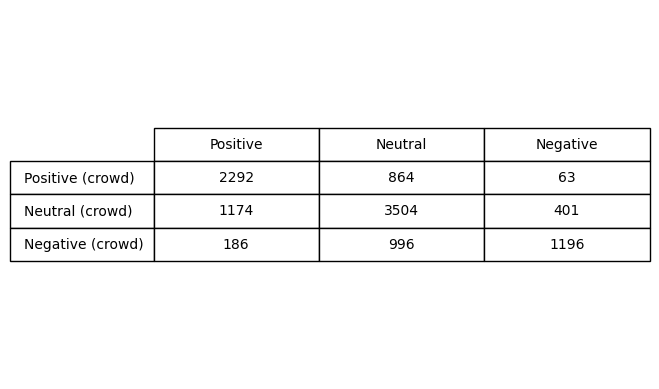

In [3]:
n_pos_pos = 0
n_neg_pos = 0
n_neu_pos = 0

n_pos_neu = 0
n_neg_neu = 0
n_neu_neu = 0

n_pos_neg = 0
n_neg_neg = 0
n_neu_neg = 0
for i in range(df1_y.size):
    if df1_y[i] == 'positive' and df2_y[i] == 'positive':
        n_pos_pos += 1
    if df1_y[i] == 'negative' and df2_y[i] == 'positive':
        n_neg_pos += 1
    if df1_y[i] == 'neutral' and df2_y[i] == 'positive':
        n_neu_pos += 1

    if df1_y[i] == 'positive' and df2_y[i] == 'neutral':
        n_pos_neu += 1
    if df1_y[i] == 'negative' and df2_y[i] == 'neutral':
        n_neg_neu += 1
    if df1_y[i] == 'neutral' and df2_y[i] == 'neutral':
        n_neu_neu += 1

    if df1_y[i] == 'positive' and df2_y[i] == 'negative':
        n_pos_neg += 1
    if df1_y[i] == 'negative' and df2_y[i] == 'negative':
        n_neg_neg += 1
    if df1_y[i] == 'neutral' and df2_y[i] == 'negative':
        n_neu_neg += 1

# Sample 3x3 data (e.g., multiplication table)
data = [ [n_pos_pos,n_pos_neu,n_pos_neg], [n_neu_pos,n_neu_neu,n_neu_neg],[n_neg_pos,n_neg_neu,n_neg_neg] ]

print(data)

row_labels = ['Positive (crowd)', 'Neutral (crowd)', 'Negative (crowd)']
col_labels = ['Positive', 'Neutral', 'Negative']
# Create figure and axis
fig, ax = plt.subplots()
ax.axis('off')  # Hide the axes

# Create table
table = ax.table(cellText=data, loc='center', cellLoc='center', rowLabels=row_labels, colLabels=col_labels)

# Adjust table appearance
table.scale(1, 2)  # Optional: scale the table for better visibility

# Show the table
plt.show()


In [1]:
# test run with tfidf
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
train = pd.read_csv('gold_train.csv', sep='\t')
train_y = train['sentiment']
train_x = train['text']

# clean up the crowdsourced data
for i in range(len(train_y)):
    if "u" in train_y[i]:
        train_y[i] = "neutral"
    elif "g" in train_y[i] or "Nedative" in train_y[i]:
        train_y[i] = "negative"
    elif "p" in train_y[i] or "o" in train_y[i] or "P" in train_y[i]:
        train_y[i] = "positive"

test = pd.read_csv('test.csv', sep='\t')
test_y = test['sentiment']
test_x = test['text']


# to make the data more uninform another step in preprocessing is removing stop words, punctuation and lowercasing the text
train_x = train_x.str.lower()

# remove punctuation
train_x = train_x.str.replace(r'[^\w\s]', '', regex=True)


train_x = train_x.str.replace(r'\d+', '', regex=True)

# remove extra spaces
train_x = train_x.str.replace(r'\s+', ' ', regex=True)

# remove leading and trailing spaces
train_x = train_x.str.strip()


#remove stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
train_x = train_x.apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))

print("train_x: ", train_x.head())


# build the pipelines for the models
svmpipe = make_pipeline(TfidfVectorizer(ngram_range=(1,2), max_features=4000), svm.SVC(kernel='linear', probability=True))
nbpipe = make_pipeline(TfidfVectorizer(ngram_range=(1,2), max_features=4000), MultinomialNB())
rfpipe = make_pipeline(TfidfVectorizer(ngram_range=(1,2), max_features=4000), RandomForestClassifier())

# time to use grid search to find the best parameters for the models 
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# imported for multi threading
from joblib import parallel_backend


# skipped because it takes too long to run
# # grid search for svm
# svcparameters = {
#     'svc__C': [0.1, 1, 10],
#     'svc__gamma': [0.01, 0.1, 1]}
# print("grid search for SVM")
# with parallel_backend('threading', n_jobs=-1):
#     svmgrid = GridSearchCV(
#         svmpipe, 
#         svcparameters, 
#         cv=2,  # for speed
#         scoring='f1_weighted', 
#         refit=True
#     )
#     svmgrid.fit(train_x, train_y)

# print("optimal parameters for SVM: ", svmgrid.best_params_)
# print("score for SVM: ", svmgrid.best_score_)
# print("best estimator: ", svmgrid.best_estimator_)



# grid search for naive bayes
nbparam = {
    'multinomialnb__alpha': [0.1, 0.5, 1.0],
    'multinomialnb__fit_prior': [True, False],
    'multinomialnb__class_prior': [None, [0.5, 0.3, 0.2], [0.2, 0.3, 0.5]],
}

print("grid search for Naive Bayes")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

with parallel_backend('threading', n_jobs=-1):
    nbgrid = GridSearchCV(nbpipe, nbparam, cv=cv, scoring='f1_macro', refit=True, verbose=1)
    nbgrid.fit(train_x, train_y)

print("parameters Naive Bayes: ", nbgrid.best_params_)
print("score for Naive Bayes: ", nbgrid.best_score_)
print("optimaö estimator for Naive Bayes: ", nbgrid.best_estimator_)

rfparam = {
    'randomforestclassifier__n_estimators': [10, 50, 100, 200],
    'randomforestclassifier__max_depth': [1, 10, 20],
    'randomforestclassifier__max_features': [ 'sqrt', 'log2'],
}
print("grid search for Random Forest")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

with parallel_backend('threading', n_jobs=-1):
    rfgrid = GridSearchCV(rfpipe, rfparam, cv=cv, scoring='f1_macro', refit=True, verbose=1)
    rfgrid.fit(train_x, train_y)
print("parameters Random Forest: ", rfgrid.best_params_)
print("score for Random Forest: ", rfgrid.best_score_)
print("optimaö estimator for Random Forest: ", rfgrid.best_estimator_)




# test the models on the test set with the best parameters
print("testing the models on the test set")
# predsvm = svmgrid.predict(test_x)

prednb = nbgrid.predict(test_x)

predrf = rfgrid.predict(test_x)



print("class rep nb" )
print(classification_report(test_y, prednb, target_names=['positive', 'neutral', 'negative']))

print("class rep rf" )
print(classification_report(test_y, predrf, target_names=['positive', 'neutral', 'negative']))










train_x:  0    theres misconception islam rn showing muslims ...
1    mr_rondeau try iron maiden friday way bell rin...
2    going fantasticfour tomorrow half expecting bo...
3    cfelan hey hey just checkng kokorissa sam smit...
4    does just drunk watch twilight best friend mon...
Name: text, dtype: object
grid search for Naive Bayes
Fitting 5 folds for each of 18 candidates, totalling 90 fits
parameters Naive Bayes:  {'multinomialnb__alpha': 1.0, 'multinomialnb__class_prior': None, 'multinomialnb__fit_prior': False}
score for Naive Bayes:  0.5644709749825217
optimaö estimator for Naive Bayes:  Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=4000, ngram_range=(1, 2))),
                ('multinomialnb', MultinomialNB(fit_prior=False))])
grid search for Random Forest
Fitting 5 folds for each of 24 candidates, totalling 120 fits
parameters Random Forest:  {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 'sqrt', 'randomf

In [2]:
# test run with count vectorizer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
train = pd.read_csv('gold_train.csv', sep='\t')
train_y = train['sentiment']
train_x = train['text']

# clean up the crowdsourced data
for i in range(len(train_y)):
    if "u" in train_y[i]:
        train_y[i] = "neutral"
    elif "g" in train_y[i] or "Nedative" in train_y[i]:
        train_y[i] = "negative"
    elif "p" in train_y[i] or "o" in train_y[i] or "P" in train_y[i]:
        train_y[i] = "positive"

test = pd.read_csv('test.csv', sep='\t')
test_y = test['sentiment']
test_x = test['text']


# to make the data more uninform another step in preprocessing is removing stop words, punctuation and lowercasing the text
train_x = train_x.str.lower()

# remove punctuation
train_x = train_x.str.replace(r'[^\w\s]', '', regex=True)


train_x = train_x.str.replace(r'\d+', '', regex=True)

# remove extra spaces
train_x = train_x.str.replace(r'\s+', ' ', regex=True)

# remove leading and trailing spaces
train_x = train_x.str.strip()


#remove stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
train_x = train_x.apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))

print("train_x: ", train_x.head())


# build the pipelines for the models
svmpipe = make_pipeline(CountVectorizer(ngram_range=(1,2), max_features=4000), svm.SVC(kernel='linear', probability=True))
nbpipe = make_pipeline(CountVectorizer(ngram_range=(1,2), max_features=4000), MultinomialNB())
rfpipe = make_pipeline(CountVectorizer(ngram_range=(1,2), max_features=4000), RandomForestClassifier())

# time to use grid search to find the best parameters for the models 
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# imported for multi threading
from joblib import parallel_backend


# skipped because it takes too long to run
# # grid search for svm
# svcparameters = {
#     'svc__C': [0.1, 1, 10],
#     'svc__gamma': [0.01, 0.1, 1]}
# print("grid search for SVM")
# with parallel_backend('threading', n_jobs=-1):
#     svmgrid = GridSearchCV(
#         svmpipe, 
#         svcparameters, 
#         cv=2,  # for speed
#         scoring='f1_weighted', 
#         refit=True
#     )
#     svmgrid.fit(train_x, train_y)

# print("optimal parameters for SVM: ", svmgrid.best_params_)
# print("score for SVM: ", svmgrid.best_score_)
# print("best estimator: ", svmgrid.best_estimator_)



# grid search for naive bayes
nbparam = {
    'multinomialnb__alpha': [0.1, 0.5, 1.0],
    'multinomialnb__fit_prior': [True, False],
    'multinomialnb__class_prior': [None, [0.5, 0.3, 0.2], [0.2, 0.3, 0.5]],
}

print("grid search for Naive Bayes")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

with parallel_backend('threading', n_jobs=-1):
    nbgrid = GridSearchCV(nbpipe, nbparam, cv=cv, scoring='f1_macro', refit=True, verbose=1)
    nbgrid.fit(train_x, train_y)

print("parameters Naive Bayes: ", nbgrid.best_params_)
print("score for Naive Bayes: ", nbgrid.best_score_)
print("optimaö estimator for Naive Bayes: ", nbgrid.best_estimator_)

rfparam = {
    'randomforestclassifier__n_estimators': [10, 50, 100, 200],
    'randomforestclassifier__max_depth': [1, 10, 20],
    'randomforestclassifier__max_features': [ 'sqrt', 'log2'],
}
print("grid search for Random Forest")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

with parallel_backend('threading', n_jobs=-1):
    rfgrid = GridSearchCV(rfpipe, rfparam, cv=cv, scoring='f1_macro', refit=True, verbose=1)
    rfgrid.fit(train_x, train_y)
print("parameters Random Forest: ", rfgrid.best_params_)
print("score for Random Forest: ", rfgrid.best_score_)
print("optimaö estimator for Random Forest: ", rfgrid.best_estimator_)




# test the models on the test set with the best parameters
print("testing the models on the test set")
# predsvm = svmgrid.predict(test_x)

prednb = nbgrid.predict(test_x)

predrf = rfgrid.predict(test_x)



print("class rep nb" )
print(classification_report(test_y, prednb, target_names=['positive', 'neutral', 'negative']))

print("class rep rf" )
print(classification_report(test_y, predrf, target_names=['positive', 'neutral', 'negative']))










train_x:  0    theres misconception islam rn showing muslims ...
1    mr_rondeau try iron maiden friday way bell rin...
2    going fantasticfour tomorrow half expecting bo...
3    cfelan hey hey just checkng kokorissa sam smit...
4    does just drunk watch twilight best friend mon...
Name: text, dtype: object
grid search for Naive Bayes
Fitting 5 folds for each of 18 candidates, totalling 90 fits
parameters Naive Bayes:  {'multinomialnb__alpha': 0.5, 'multinomialnb__class_prior': None, 'multinomialnb__fit_prior': True}
score for Naive Bayes:  0.5735068329553057
optimaö estimator for Naive Bayes:  Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=4000, ngram_range=(1, 2))),
                ('multinomialnb', MultinomialNB(alpha=0.5))])
grid search for Random Forest
Fitting 5 folds for each of 24 candidates, totalling 120 fits
parameters Random Forest:  {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 'sqrt', 'randomforestcl

In [ ]:
# the best model was the naive bayes model with the following parameters and using the count vectorizer:
# {'multinomialnb__alpha': 0.5, 'multinomialnb__class_prior': None, 'multinomialnb__fit_prior': True}
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import  StratifiedKFold, RandomizedSearchCV
from joblib import parallel_backend
import numpy as np
import pandas as pd
train = pd.read_csv('crowdsourced_train.csv', sep='\t')
train_y = train['sentiment']
train_x = train['text']

# clean up the crowdsourced data
for i in range(len(train_y)):
    if "u" in train_y[i]:
        train_y[i] = "neutral"
    elif "g" in train_y[i] or "Nedative" in train_y[i]:
        train_y[i] = "negative"
    elif "p" in train_y[i] or "o" in train_y[i] or "P" in train_y[i]:
        train_y[i] = "positive"

test = pd.read_csv('test.csv', sep='\t')
test_y = test['sentiment']
test_x = test['text']

def cleanTrain(train_x):
    # to make the data more uninform another step in preprocessing is removing stop words, punctuation and lowercasing the text
    train_x = train_x.str.lower()

    # remove punctuation
    train_x = train_x.str.replace(r'[^\w\s]', '', regex=True)


    train_x = train_x.str.replace(r'\d+', '', regex=True)

    # remove extra spaces
    train_x = train_x.str.replace(r'\s+', ' ', regex=True)

    # remove leading and trailing spaces
    train_x = train_x.str.strip()


    #remove stop words
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    train_x = train_x.apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))

    # remove extra spaces
    train_x = train_x.str.replace(r'\s+', ' ', regex=True)

    # use lemmatization to reduce words to their base form
    from nltk.stem import WordNetLemmatizer
    import nltk
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    train_x = train_x.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    
    return train_x
gridsearch = {
    'multinomialnb__alpha': [0.001,0.01, 0.1,0.3, 0.5, 0.7, 1.0],
    'multinomialnb__fit_prior': [True, False],
    'multinomialnb__class_prior': [None, [0.5, 0.3, 0.2], [0.2, 0.3, 0.5]],
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# build the pipelines for the models
nbpipe = make_pipeline(CountVectorizer(ngram_range=(1,2)), MultinomialNB())

def evalForCrowd(test_y, test_x, cleanTrain, gridsearch, cv, nbpipe):
    train = pd.read_csv('crowdsourced_train.csv', sep='\t')
    train_y = train['sentiment']
    # clean up the crowdsourced data
    for i in range(len(train_y)):
        if "u" in train_y[i]:
            train_y[i] = "neutral"
        elif "g" in train_y[i] or "Nedative" in train_y[i]:
            train_y[i] = "negative"
        elif "p" in train_y[i] or "o" in train_y[i] or "P" in train_y[i]:
            train_y[i] = "positive"
    train_x = train['text']
    train_x = cleanTrain(train_x)

    print("train_x: ", train_x.head())

# this model will then be optimized again with grid search
# time to use grid search to find the best parameters for the models

    with parallel_backend('threading'):
        nbrandom = RandomizedSearchCV(nbpipe, gridsearch, n_iter=10, cv=cv, scoring='f1_macro', refit=True, verbose=1)
        nbrandom.fit(train_x, train_y)

# make a new model with the best parameters
    nbpipe = make_pipeline(CountVectorizer(ngram_range=(1,10)), 
                           MultinomialNB(alpha=nbrandom.best_params_['multinomialnb__alpha'], 
                                         fit_prior=nbrandom.best_params_['multinomialnb__fit_prior'], 
                                         class_prior=nbrandom.best_params_['multinomialnb__class_prior']))
    nbpipe.fit(train_x, train_y)
# now evaluate the model on the test set
    evaluateModel(test_y, test_x, nbpipe)

def evalForGold(test_y, test_x, cleanTrain, nbpipe, gridsearch, cv):
    train = pd.read_csv('gold_train.csv', sep='\t')
    train_y = train['sentiment']
    train_x = train['text']
    train_x = cleanTrain(train_x)

    with parallel_backend('threading'):
        nbrandom = RandomizedSearchCV(nbpipe, gridsearch, n_iter=10, cv=cv, scoring='f1_macro', refit=True, verbose=1)
        nbrandom.fit(train_x, train_y)

    nbpipe = make_pipeline(CountVectorizer(ngram_range=(1,10)), MultinomialNB(alpha=nbrandom.best_params_['multinomialnb__alpha'], fit_prior=nbrandom.best_params_['multinomialnb__fit_prior'], class_prior=nbrandom.best_params_['multinomialnb__class_prior']))

    nbpipe.fit(train_x, train_y)
# now evaluate the model on the test set
    evaluateModel(test_y, test_x, nbpipe)

def evaluateModel(test_y, test_x, nbpipe):
    print("accuracy nb: ", nbpipe.score(test_x, test_y))
    print("f1 score nb: ", nbpipe.score(test_x, test_y, average='weighted'))
    print("precision nb: ", nbpipe.score(test_x, test_y, average='macro'))
    print("recall nb: ", nbpipe.score(test_x, test_y, average='micro'))
    print("confusion matrix nb: ", nbpipe.score(test_x, test_y, average=None))
evalForCrowd(test_y, test_x, cleanTrain, gridsearch, cv, nbpipe)
evalForGold(test_y, test_x, cleanTrain, nbpipe, gridsearch, cv)



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Caps\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


train_x:  0    there misconception islam rn showing muslim fa...
1    mr_rondeau try iron maiden friday way bell rin...
2    going fantasticfour tomorrow half expecting bo...
3    cfelan hey hey just checkng kokorissa sam smit...
4    doe just drunk watch twilight best friend mond...
Name: text, dtype: object
Fitting 5 folds for each of 10 candidates, totalling 50 fits
accuracy nb:  0.5912382331643736
f1 score nb:  0.5912382331643736
precision nb:  0.5912382331643736
recall nb:  0.5912382331643736
confusion matrix nb:  0.5912382331643736


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Caps\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Fitting 5 folds for each of 10 candidates, totalling 50 fits
accuracy nb:  0.752172338884866
f1 score nb:  0.752172338884866
precision nb:  0.752172338884866
recall nb:  0.752172338884866
confusion matrix nb:  0.752172338884866


# any difference between the two datasets?
the crowdsourced dataset gave a less accurate resut than the gold dataset.